# Data description

The data was taken over a 2-month period in India with 25 features. 

The target is the 'classification', which is either 'ckd' or 'notckd'

We use 24 + class = 25 ( 11 numeric ,14 nominal)

- Age(numerical) - age in years
- Blood Pressure(numerical) - bp in mm/Hg
- Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)
- Albumin(nominal) - al - (0,1,2,3,4,5)
- Sugar(nominal) - su - (0,1,2,3,4,5)
- Red Blood Cells(nominal) - rbc - (normal,abnormal)
- Pus Cell (nominal) - pc - (normal,abnormal)
- Pus Cell clumps(nominal) - pcc - (present,notpresent)
- Bacteria(nominal) - ba - (present,notpresent)
- Blood Glucose Random(numerical) - bgr in mgs/dl
- Blood Urea(numerical) -bu in mgs/dl
- Serum Creatinine(numerical) - sc in mgs/dl
- Sodium(numerical) - sod in mEq/L
- Potassium(numerical) - pot in mEq/L
- Hemoglobin(numerical) - hemo in gms
- Packed Cell Volume(numerical)
- White Blood Cell Count(numerical) - wc in cells/cumm
- Red Blood Cell Count(numerical) - rc in millions/cmm
- Hypertension(nominal) - htn - (yes,no)
- Diabetes Mellitus(nominal) - dm - (yes,no)
- Coronary Artery Disease(nominal) - cad - (yes,no)
- Appetite(nominal) - appet - (good,poor)
- Pedal Edema(nominal) - pe - (yes,no)
- Anemia(nominal) - ane - (yes,no)
- Class (nominal)- class - (ckd,notckd)

Acknowledgements

https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

# Loading the dataset and first look

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ckdisease/kidney_disease.csv


In [2]:
df = pd.read_csv('/kaggle/input/ckdisease/kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

# Data cleaner

In [6]:
def data_cleaner(data):
    data.fillna(0, inplace=True)
    data = pd.get_dummies(data,columns =['htn', 'dm', 'cad', 'pc', 'pcc', 'ba', 'rbc', 'appet', 'pe', 'ane'], dtype = bool, drop_first=True)
    return data

In [7]:
df = data_cleaner(df)
df

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,ba_notpresent,ba_present,rbc_abnormal,rbc_normal,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,0.0,...,True,False,False,False,True,False,True,False,True,False
1,1,7.0,50.0,1.020,4.0,0.0,0.0,18.0,0.8,0.0,...,True,False,False,False,True,False,True,False,True,False
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,0.0,...,True,False,False,True,False,True,True,False,False,True
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,True,False,False,True,False,True,False,True,False,True
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,0.0,...,True,False,False,True,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,...,True,False,False,True,True,False,True,False,True,False
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,True,False,False,True,True,False,True,False,True,False
397,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,...,True,False,False,True,True,False,True,False,True,False
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,True,False,False,True,True,False,True,False,True,False


In [8]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc', 'classification', 'htn_no', 'htn_yes',
       'dm_\tno', 'dm_\tyes', 'dm_ yes', 'dm_no', 'dm_yes', 'cad_\tno',
       'cad_no', 'cad_yes', 'pc_abnormal', 'pc_normal', 'pcc_notpresent',
       'pcc_present', 'ba_notpresent', 'ba_present', 'rbc_abnormal',
       'rbc_normal', 'appet_good', 'appet_poor', 'pe_no', 'pe_yes', 'ane_no',
       'ane_yes'],
      dtype='object')

# The model

This portion will keep on getting updated.

In [9]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

target = ['classification']
features = ['htn_no', 'dm_\tno','dm_no', 'cad_\tno', 'cad_no', 'pc_abnormal', 'pcc_notpresent', 'ba_notpresent', 'sg', 'al', 'su', 
            'age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'rbc_abnormal', 'appet_poor', 'pe_no', 'ane_no']

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('XGBClassifier', XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticRegression: 0.932500 (0.035444)
DecisionTreeClassifier: 0.955000 (0.026926)
XGBClassifier: 0.985000 (0.016583)
GradientBoostingClassifier: 0.967500 (0.022500)
KNeighborsClassifier: 0.850000 (0.044721)
RandomForestClassifier: 0.985000 (0.016583)


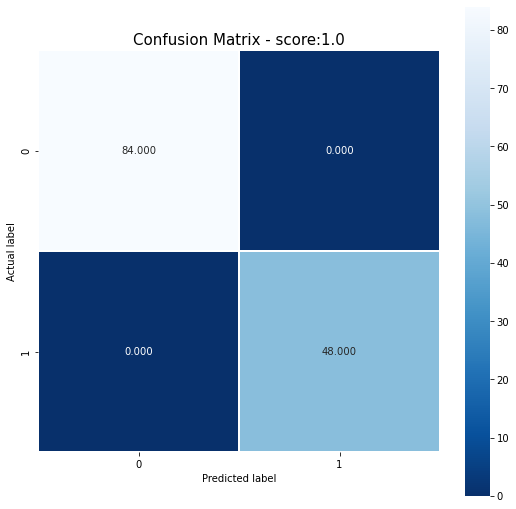

              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        84
      notckd       1.00      1.00      1.00        48

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



In [10]:
model=XGBClassifier(random_state=0)
model.fit(X,y)
y_pred=model.predict(X_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))